In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset, variables 

Loading data from file "california_wine.csv" and printing first records. "california_wine.csv" contains datas of grapes production in California in years 1980-2020.

link: https://www.kaggle.com/datasets/jarredpriester/california-wine-production-19802020

In [5]:
data = pd.read_csv('california_wine.csv')
data.head()

,Year,CommodityCode,CropName,CountyCode,County,HarvestedAcres,Yield(Unit/Acre),Production,Price(Dollars/Unit),Unit,Value(Dollars)
0,2020,216299,GRAPESWINE,1,Alameda,2530.0,5.14,13000.0,1497.69,Tons,19470000
1,2020,216299,GRAPESWINE,5,Amador,5360.0,2.31,12400.0,1318.31,Tons,16347000
2,2020,216299,GRAPESWINE,9,Calaveras,579.0,3.06,1770.0,1325.99,Tons,2347000
3,2020,216299,GRAPESWINE,11,Colusa,747.0,6.02,4500.0,684.67,Tons,3081000
4,2020,216299,GRAPESWINE,13,ContraCosta,1940.0,4.69,9090.0,751.27,Tons,6829000


In [6]:
print("Variable list: ")
print(data.columns.values)

v_categorical_df = ['Year', 'CommodityCode', 'CropName', 'CountyCode', 'County', 'Unit']

v_numerical_df = ['Yield(Unit/Acre)', 'Production', 'Price(Dollars/Unit)', 'Value(Dollars)', 'HarvestedAcres',]


Variable list: 
['Year' 'CommodityCode' 'CropName' 'CountyCode' 'County' 'HarvestedAcres'
 'Yield(Unit/Acre)' 'Production' 'Price(Dollars/Unit)' 'Unit'
 'Value(Dollars)']


In [7]:
data[v_numerical_df].describe()

,Yield(Unit/Acre),Production,Price(Dollars/Unit),Value(Dollars),HarvestedAcres
count,1266.000000,1.278000e+03,1278.000000,1.315000e+03,1302.000000
mean,5.176288,1.023638e+05,928.027363,5.961252e+07,14546.443164
std,3.267309,1.711560e+05,1244.949783,1.237376e+08,20576.581018
min,0.060000,2.300000e+01,74.000000,1.150000e+04,3.000000
25%,2.940000,3.259750e+03,335.827500,1.600500e+06,805.750000
50%,4.040000,1.740000e+04,723.500000,1.220210e+07,3699.000000
75%,7.185000,1.298860e+05,1236.887500,6.340450e+07,23884.500000
max,25.000000,1.040100e+06,36342.070000,2.030002e+09,128613.000000


Six variables of dataset are categorical and five are numerical. In this dataset all statisctics of numerical variables are meanigful.


# Scatter plot

Using scatter plot we can notice some dependencies between variables in dataset:

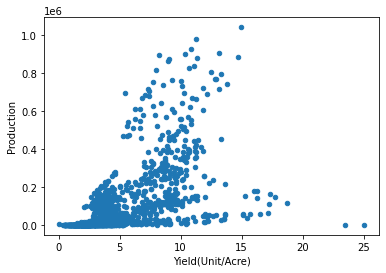

In [8]:
#relation between yield and price
data.plot.scatter(x='Yield(Unit/Acre)', y='Production')

plt.show()

Diagram shows that generally production is bigger if yields are bigger.

Let's see how price of grapes is influenced by yield and production.

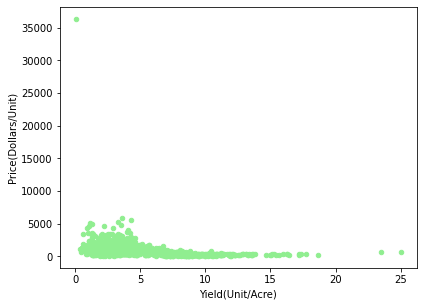

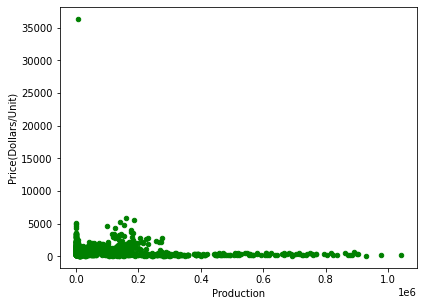

In [120]:
#relation between yield and price
data.plot.scatter(x='Yield(Unit/Acre)', y='Price(Dollars/Unit)', color = 'lightgreen')

#relation between production and price
data.plot.scatter(x='Production', y='Price(Dollars/Unit)', color = 'green')

plt.show()

As we see from the digram usually the prices of grapes are higher if the yields are small. The similar situation is with production. It is propably caused by bigger demand than supply in years when harvest were bad.

Relation between CountyCode and Production:

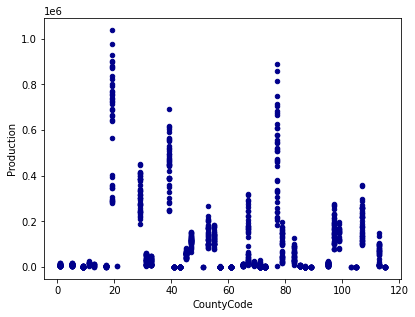

In [121]:
#relation between CountyCode and Production
data.plot.scatter(x='CountyCode', y='Production', color = 'darkblue')
plt.show()

The diagram shows that there are four counties where production was bigger than 400000 tons many times. One county had once production bigger than 1000000 tons. However there are also areas where it is  always low.

Relation between CountyCode and HarvestedAcres:

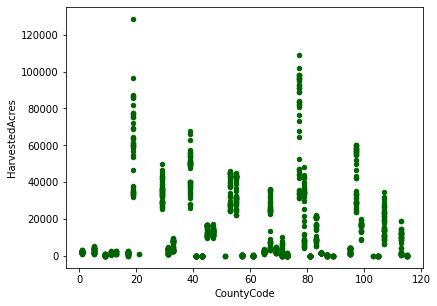

In [122]:
#relation between CountyCode and Production
data.plot.scatter(x='CountyCode', y='HarvestedAcres', color = 'darkgreen')
plt.show()

We see that diagram of relation between CountyCode and HarvestedAcres looks similar to diagram of relation between CountyCode and Production. That means the bigger production in some counties is mainly caused by bigger planting.

# Boxplot

Creating boxplot of Price(Dollars/Unit) versus years 1980, 2000 and 2020:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


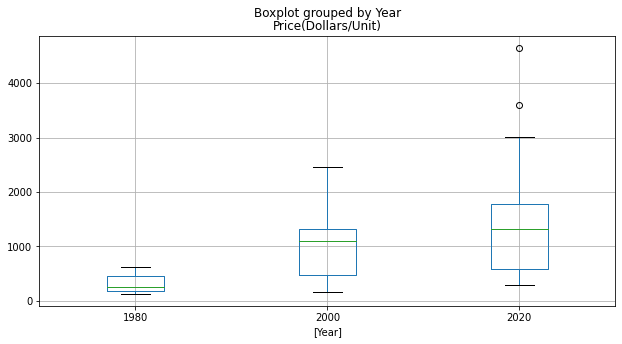

In [123]:
#changing size of figure
plt.rcParams["figure.figsize"] = (10, 5)

data_box = data.loc[(data['Year'] == 1980) | (data['Year'] == 2000) | (data['Year'] == 2020)]

data_box.boxplot(column=['Price(Dollars/Unit)'], by = ['Year'])

plt.show()
#setting initial size
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

Both minimum, median and maximum of prices were gradually increasing during fourty years. The prices were getting more different in individual years. In 1980 the biggest difference was in quartile group 3, in 2000 and 2020 in quartile group 4. Since 2000 to 2020 prices weren't changed so significantly as since 1980 to 2000. The smallest changes we can observe in minimum price.

# Selecting/sorting variables, bars

Finding counties with more than 50000 harvested acres in 2020:

In [124]:
data_b_h = data.loc[(data['HarvestedAcres'] > 50000) & (data['Year'] == 2020)]
#sorting by biggest HarvestedAcres
data_b_h.sort_values(by = ['HarvestedAcres'], ascending=False)

,Year,CommodityCode,CropName,CountyCode,County,HarvestedAcres,Yield(Unit/Acre),Production,Price(Dollars/Unit),Unit,Value(Dollars)
23,2020,216299,GRAPESWINE,77,SanJoaquin,91200.0,6.67,608000.0,560.71,Tons,340913000
6,2020,216299,GRAPESWINE,19,Fresno,56900.0,12.13,690000.0,362.14,Tons,249877000
31,2020,216299,GRAPESWINE,97,Sonoma,56800.0,2.61,148000.0,2375.08,Tons,351512000


There are only three counties where were more than 50000 harvested acres in 2020. Now we will check the changes of that surface in these counties over the years.

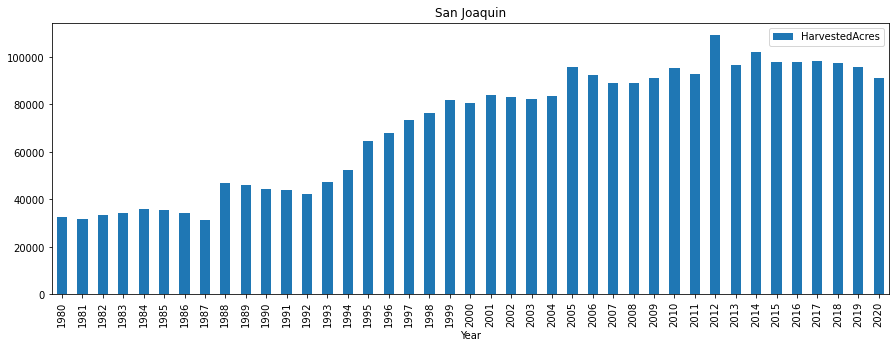

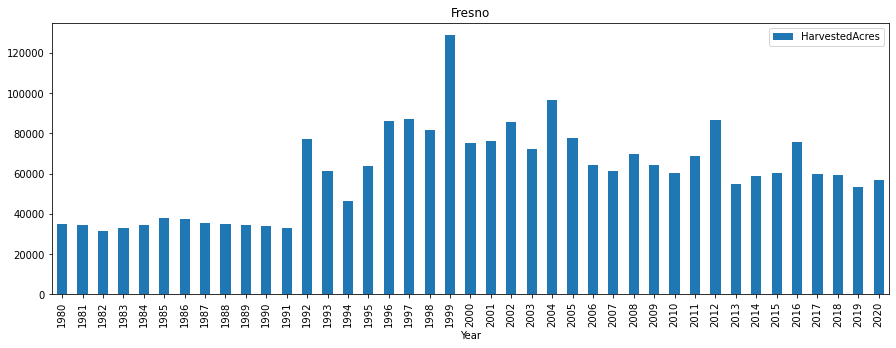

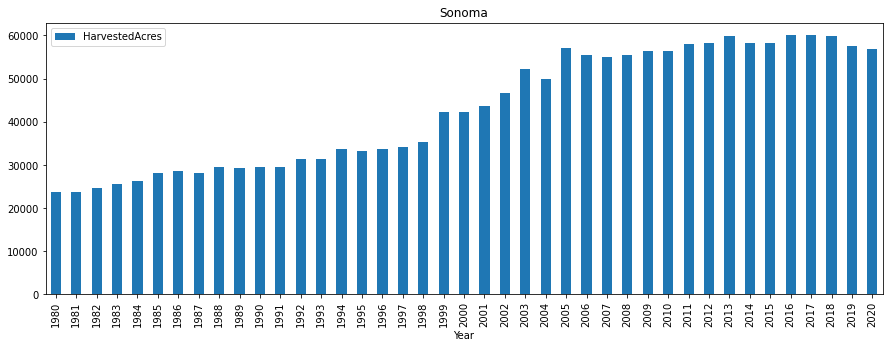

In [125]:
#changing size of figure
plt.rcParams["figure.figsize"] = (15,5)

#San Joaquin
first_c = data.loc[(data['County'] == 'SanJoaquin')]
#sorting by years to get elder datas as first
first_c = first_c.sort_values(by=['Year'], ascending=True)
first_c.plot.bar(x='Year', y='HarvestedAcres')
plt.title("San Joaquin")

#Fresno
second_c = data.loc[(data['County'] == 'Fresno')]
#sorting by years to get elder datas as first
second_c = second_c.sort_values(by=['Year'], ascending=True)
second_c.plot.bar(x='Year', y='HarvestedAcres')
plt.title("Fresno")

#Sonoma
third_c = data.loc[(data['County'] == 'Sonoma')]
#sorting by years to get elder datas as first
third_c = third_c.sort_values(by=['Year'], ascending=True)
third_c.plot.bar(x='Year', y='HarvestedAcres')
plt.title("Sonoma")

plt.show()

#setting initial size
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

Surface of grapes plantations increased since year 1980 in these three counties. In San Joaquin and Sonoma it was increasing gradually and now it looks rather stably. In Fresno the growth was chaotic. It had enlarged in the nineties and had maximum in 1999 but later it was generally getting lower.  

Finding counties with best yields in 2020:

In [126]:
data_2020 = data.loc[(data['Year'] == 2020)]

data_2020.sort_values(by=['Yield(Unit/Acre)'], ascending=False)

,Year,CommodityCode,CropName,CountyCode,County,HarvestedAcres,Yield(Unit/Acre),Production,Price(Dollars/Unit),Unit,Value(Dollars)
34,2020,216299,GRAPESWINE,107,Tulare,6500.0,17.23,112000.0,317.00,Tons,35504000
8,2020,216299,GRAPESWINE,31,Kings,3590.0,16.46,59100.0,286.87,Tons,16954000
6,2020,216299,GRAPESWINE,19,Fresno,56900.0,12.13,690000.0,362.14,Tons,249877000
10,2020,216299,GRAPESWINE,39,Madera,33000.0,11.82,390000.0,348.98,Tons,136101000
13,2020,216299,GRAPESWINE,47,Merced,13200.0,10.91,144000.0,440.41,Tons,63419000
32,2020,216299,GRAPESWINE,99,Stanislaus,8500.0,9.49,80700.0,440.61,Tons,35557000
19,2020,216299,GRAPESWINE,67,Sacramento,36000.0,8.19,295000.0,528.73,Tons,155975000
35,2020,216299,GRAPESWINE,113,Yolo,19200.0,7.81,150000.0,699.67,Tons,104951000
7,2020,216299,GRAPESWINE,29,Kern,25200.0,7.54,190000.0,314.04,Tons,59668000
18,2020,216299,GRAPESWINE,65,Riverside,1740.0,6.72,11700.0,1623.93,Tons,19000000


There is big disproportion between the best and the worst yields. What is interesting San Joaquin is in 11th position despite the fact that has the biggest number of harvested acres. Sonoma has also not good position.